# Astronomy I & II


1. [Astropy Basics](#astropy_basics)
 
    * Constants and units
    * Celestial Coordinates
    * Time and dates
    * FITS files
         * FITS Tables (and other common formats)
         * Spectra
         * Images & WCS

2. [Astroquery](#astroquery)
 * 

3. [Photutils](#photutils)
 * Source detection (DAO vs SExtractor)
 * Modelling: Measuring the PSF FHWM with a moffat profile
 * Background modelling and aperture Photometry

4. [Astropy: Matching catalogues](#matching)
 * Exercice: match catalogue of sextracted sourced with one made with astroquery
   * Bad way: direct search on a loop.
   * Good way: use astropy's matching method 

5. [Pyephem/Astroplan](#astroplan)
 * Earth, Time and Fixed Bodies
 * Sun rising, setting and dark time
 * Night planning: objects visibility and distance to moon
 * Exercice: Make plan to observe 3 objects



#### (Optional if time)

* Astroscrappy: Cosmic ray detection / rejection / masking
* Cosmology in astropy
* Data reduction example. From Raw optical imaging to reduced catalogue
* Sewpy: Sextractor wrapper
* GlueViz in Plotting or Astronomy?
* Naima
* IDL / ROOT functions or wrappers


In [1]:
import numpy as np
import math
import seaborn

<a id=astropy_basics></a>
## 1. Astropy Basics
In this section, we will explain the basics of what can be done with Astropy, such as working with internal units, opening FITS files, tables, spectra and WCS.

### Constants and Units
Astropy provides a large amount of astronomical constants..

In [2]:
from astropy import constants as const
from astropy import units as u

By default astropy constants uses S.I. units...

In [3]:
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010


It can be transformed to any units...

In [4]:
const.c.to('km/s')

<Quantity 299792.458 km / s>

In [5]:
const.c.to('pc/yr')

<Quantity 0.3066013937879528 pc / yr>

You can also define your own constant using astropy Units

In [6]:
my_emission_line_flux = 12.32 * u.erg / u.cm ** 2 / u.s
my_emission_line_flux

<Quantity 12.32 erg / (cm2 s)>

Here we can compute earth's orbit speed using astropy constants...

In [7]:
speed_of_earth = const.au * 2 * math.pi / u.yr
speed_of_earth.to('km/s')

<Quantity 29.785254365591538 km / s>

### <span style="color:blue">Exercise:</span> Working with astronomy constants
Compute (approximately) the speed of the earth's orbit using astropy's mass of the Sun.

In [8]:
# Your code here

Press shift+E to view the solution in next cell.

In [9]:
speed_of_earth_2 = np.sqrt(const.G * const.M_sun / const.au) 
speed_of_earth_2.to('km/s')

<Quantity 29.788833564362875 km / s>

### Celestial Coordinates

The simplest coordinate we can define is a single point in the sky, by default in the ICRS frame.

In [10]:
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

#### Definition
It can be defined in almost any format used in astronomy (and there are many, as usual...) all representing the same location.

In [11]:
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

Astropy also has a significantly large list of sources than can be retrieved by its name:

In [12]:
a_big_blue_star = SkyCoord.from_name('rigel')

#### Transformation
We can easily convert to other coordinate systems, like the galactic...

In [13]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    ( 121.12334339, -21.6403587)>

Or even get what is the closest constellation to the object, very useful for astronomers as you know...

In [14]:
c.get_constellation()

u'Andromeda'

#### Distances
Coordinates allow also to define distances:

In [15]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)
print (c.cartesian.x, c.cartesian.y, c.cartesian.z)

(<Quantity 568.7128654235231 kpc>, <Quantity 107.30089740420249 kpc>, <Quantity 507.88994291875713 kpc>)


If we define one or more coordinates we can compute the distance between the two objects:

In [16]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')

print ("Angular Separation: %s" % c1.separation(c2))
print ("Distance between objects: %s" % c1.separation_3d(c2))

Angular Separation: 1d24m16.343s
Distance between objects: 1.52286024151 pc


#### Catalogue of sources

A catalogue of positions can also be created using numpy arrays:

In [17]:
ras = np.array([0-.7, 21.5, 120.9]) * u.deg  
decs = np.array([4.5, -5.2, 6.3]) * u.deg   
catalogue = SkyCoord(ras, decs, frame='icrs')
catalogue.galactic

<SkyCoord (Galactic): (l, b) in deg
    [(  98.38367576, -55.76513019), ( 145.0410998 , -66.57665941),
     ( 215.51872772,  18.90455248)]>

## Time and Date
The astropy.time package provides functionality for manipulating times and dates used in astronomy, such as UTC or MJD.
#### Definition

In [18]:
from astropy.time import Time
times = ['2017-09-13T00:00:00', '2017-09-15T11:20:15.123456789',]
t1 = Time(times)
t1

<Time object: scale='utc' format='isot' value=['2017-09-13T00:00:00.000' '2017-09-15T11:20:15.123']>

Default format is ISOT and scale UTC, but it can be set to others.

In [19]:
times = [58009, 58011.47239726]
t2 = Time(times, format='mjd', scale='tai')
t2

<Time object: scale='tai' format='mjd' value=[ 58009.          58011.47239726]>

#### Format conversion

In [20]:
print ("To julian date: %s" % t1[0].jd)
print ("To modified julian date: %s" % t1[0].mjd)
print ("To FITS: %s" % t1[0].fits)
print ("To GPS: %s" % t1[0].gps)
print ("To Bessel Epoch Year: %s" % t1[0].byear_str)
print ("To Julian Epoch Year: %s" % t1[0].jyear_str)

To julian date: 2458009.5
To modified julian date: 58009.0
To FITS: 2017-09-13T00:00:00.000(UTC)
To GPS: 1189296018.0
To Bessel Epoch Year: B2017.700
To Julian Epoch Year: J2017.699


## FITS files

### Tables in FITS

We will read a FITS table containing a catalogue, in this case a custom collection of Gaia stars created with CosmoHub.

With two instructions I can open the fits file and preview the content of it. For this file we find a list of two units, a primary HDU and the binary table:

In [21]:
from astropy.io import fits
gaia_hdulist = fits.open('../resources/cosmohub_catalogue.fits')

gaia_hdulist.info()

Filename: ../resources/cosmohub_catalogue.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     39   111R x 8C   [D, D, D, D, K, D, D, D]   


To access the primary HDU, we can directly call it by its name, and preview the header like this:

In [22]:
gaia_hdulist['PRIMARY'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

As the second extension has no name, we can access to it from its index:

In [23]:
gaia_hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   64 / length of dimension 1                          
NAXIS2  =                  111 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'ra_error'                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'dec     '        

The data is contained in the Binary table and can be accessed very similarly to a numpy/pandas table:

In [24]:
import matplotlib.pylab as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/serrano/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


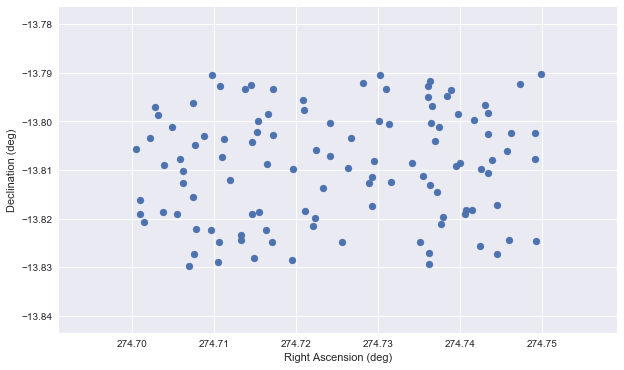

In [25]:
plt.scatter(gaia_hdulist[1].data['ra'], gaia_hdulist[1].data['dec'])
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')

### Tables not in FITS
Even FITS is widely used in astronomy, there are a several other widely used formats for storing table and catalogue data. The module astropy.io.ascii provides read capability for most of them. Find the list of supported formats in astropy's documentation: http://docs.astropy.org/en/stable/io/ascii/index.html#supported-formats 

In [26]:
from astropy.io import ascii
data = ascii.read("../resources/sources.dat")  
print(data)

obsid redshift  X    Y      object  
----- -------- ---- ---- -----------
 3102     0.32 4167 4085 Q1250+568-A
  877     0.22 4378 3892   Source 82


The read method tries to identify the file format automatically, but it can be specified in the format input parameter:

In [27]:
data = ascii.read("../resources/sources.csv", format='csv')  
print(data)

obsid redshift  X    Y      object  
----- -------- ---- ---- -----------
 3102     0.32 4167 4085 Q1250+568-A
  877     0.22 4378 3892   Source 82


Any catalogue can then be exported (in this case to screen) to any format:

In [28]:
import sys
ascii.write(data, sys.stdout, format='latex')

\begin{table}
\begin{tabular}{ccccc}
obsid & redshift & X & Y & object \\
3102 & 0.32 & 4167 & 4085 & Q1250+568-A \\
877 & 0.22 & 4378 & 3892 & Source 82 \\
\end{tabular}
\end{table}


### Spectra data
Let's read a fits file containing spectra for a QSO observed with SDSS.

First we want to open the fits and inspect what it's in there...

In [29]:
sdss_qso_hdulist = fits.open('../resources/sdss_qso_spec-0501-52235-0313.fits')

sdss_qso_hdulist.info()

Filename: ../resources/sdss_qso_spec-0501-52235-0313.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     143   ()      
  1  COADD       BinTableHDU     26   3805R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ     BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE     BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


The coadd seems to have the coadded spectra from several observations.

Let's now inspect what columns we get in the spectra:

In [30]:
sdss_qso_hdulist['COADD'].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

We can now have a look at the spectra data itself, using a scatter plot.

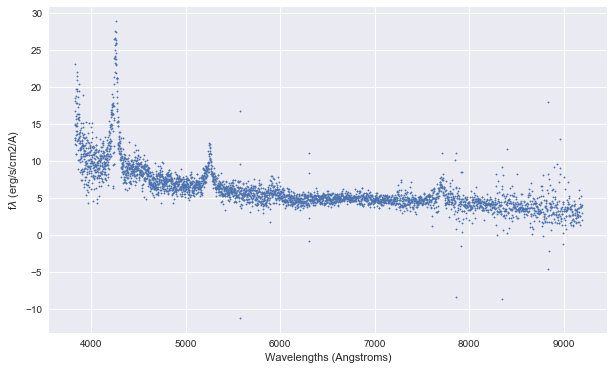

In [31]:
plt.scatter(10**sdss_qso_hdulist['COADD'].data['loglam'], sdss_qso_hdulist['COADD'].data['flux'], s=2)
plt.xlabel('Wavelengths (Angstroms)')
plt.ylabel(r'f$\lambda$ (erg/s/cm2/A)')

The previous spectra seems to have some bad measurements, but we can make use of the OR mask included to discard those measurements. 

To better visualize the spectra file we will apply a gaussian filtering...

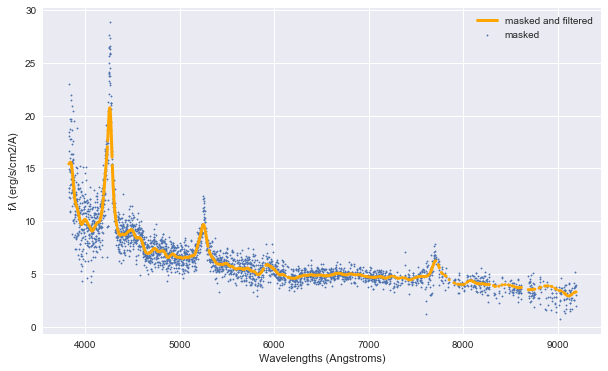

In [32]:
from scipy.ndimage.filters import gaussian_filter

y_values_masked = np.ma.masked_where(sdss_qso_hdulist['COADD'].data['or_mask'], 
                                     sdss_qso_hdulist['COADD'].data['flux'])
x_values_masked = np.ma.masked_where(sdss_qso_hdulist['COADD'].data['or_mask'], 
                                     sdss_qso_hdulist['COADD'].data['loglam'])

plt.scatter(10**x_values_masked, y_values_masked, s=2, label='masked')
plt.plot(10**x_values_masked, gaussian_filter(y_values_masked, sigma=16), 
         color='orange', linewidth=3, label='masked and filtered')
plt.xlabel('Wavelengths (Angstroms)')
plt.ylabel(r'f$\lambda$ (erg/s/cm2/A)')
plt.legend()

Another information that is included in this spectra file is the emission lines measured by SDSS. We can inspect the columns of that extension:

In [33]:
sdss_qso_hdulist['SPZLINE'].data.columns

ColDefs(
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'LINENAME'; format = '13A'
    name = 'LINEWAVE'; format = 'D'
    name = 'LINEZ'; format = 'E'
    name = 'LINEZ_ERR'; format = 'E'
    name = 'LINESIGMA'; format = 'E'
    name = 'LINESIGMA_ERR'; format = 'E'
    name = 'LINEAREA'; format = 'E'
    name = 'LINEAREA_ERR'; format = 'E'
    name = 'LINEEW'; format = 'E'
    name = 'LINEEW_ERR'; format = 'E'
    name = 'LINECONTLEVEL'; format = 'E'
    name = 'LINECONTLEVEL_ERR'; format = 'E'
    name = 'LINENPIXLEFT'; format = 'J'
    name = 'LINENPIXRIGHT'; format = 'J'
    name = 'LINEDOF'; format = 'E'
    name = 'LINECHI2'; format = 'E'
)

### <span style="color:blue">Exercise:</span> Working with spectra
Display the emission lines available in the SPZLINE extension over the QSO spectra

In [34]:
# Your code here

Press shift+E to view the solution in next cell.

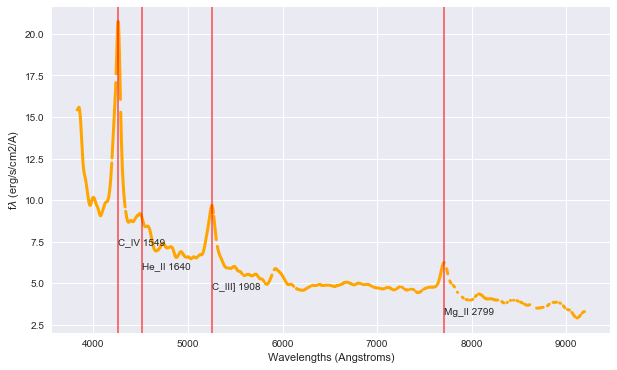

In [35]:
# Solution
plt.plot(10**x_values_masked, gaussian_filter(y_values_masked, sigma=16), 
         color='orange', linewidth=3)
plt.xlabel('Wavelengths (Angstroms)')
plt.ylabel(r'f$\lambda$ (erg/s/cm2/A)')

for eline in sdss_qso_hdulist['SPZLINE'].data:
    if eline['LINECHI2'] > 0:
        line_wl = eline['LINEWAVE'] * (1 + eline['LINEZ'])
        plt.axvline(x=line_wl, color='red', alpha=0.6)
        plt.text(line_wl, 
                 eline['LINECONTLEVEL'] * 0.7,
                 eline['LINENAME'])

## FITS images and WCS

In [36]:
hst_hdulist = fits.open('../resources/hst_656nmos.fits')
hst_hdulist.info()

Filename: ../resources/hst_656nmos.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     290   (1600, 1600)   float32   
  1  656nmos_cvt.tab  TableHDU       353   1R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


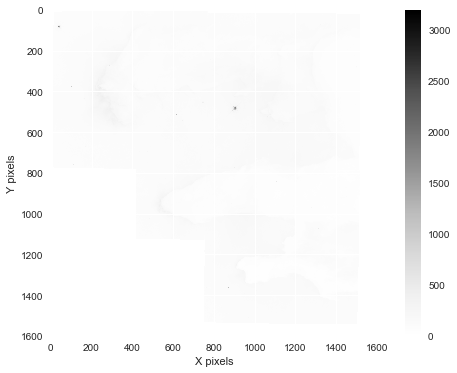

In [37]:
plt.imshow(hst_hdulist['PRIMARY'].data)
plt.xlabel('X pixels')
plt.ylabel('Y pixels')
plt.colorbar()

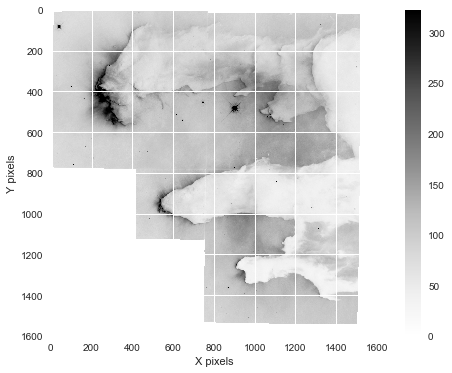

In [38]:
from astropy.visualization import ZScaleInterval

norm = ZScaleInterval()
vmin, vmax = norm.get_limits(hst_hdulist['PRIMARY'].data)

plt.imshow(hst_hdulist[0].data, vmin=vmin, vmax=vmax, interpolation='none')
plt.xlabel('X pixels')
plt.ylabel('Y pixels')
plt.colorbar()

The image header contains the World Coordinate System (WCS) information, stored in a set of keywords (CD, CRVAL, CRPIX and optionally some distortion parameters). The WCS provides the projection of the image in the sky, allowing to work with pixels and sky coordinates.

In [39]:
print ("WCS projection type:")
print (hst_hdulist['PRIMARY'].header['CTYPE1'])
print (hst_hdulist['PRIMARY'].header['CTYPE2'])

print ("WCS reference values:")
print (hst_hdulist['PRIMARY'].header['CRVAL1'])
print (hst_hdulist['PRIMARY'].header['CRVAL2'])

print ("WCS reference pixel:")
print (hst_hdulist['PRIMARY'].header['CRPIX1'])
print (hst_hdulist['PRIMARY'].header['CRPIX2'])

print ("WCS pixel to sky matrix:")
print (hst_hdulist['PRIMARY'].header['CD1_1'])
print (hst_hdulist['PRIMARY'].header['CD1_2'])
print (hst_hdulist['PRIMARY'].header['CD2_1'])
print (hst_hdulist['PRIMARY'].header['CD2_2'])

WCS projection type:
RA---TAN
DEC--TAN
WCS reference values:
274.711492477
-13.8163840072
WCS reference pixel:
386.5
396.0
WCS pixel to sky matrix:
1.878013e-05
-2.031193e-05
-2.029358e-05
-1.879711e-05


We can load the WCS of the image directly like this:

In [40]:
from astropy import wcs

hst_image_wcs = wcs.WCS(hst_hdulist['PRIMARY'].header)

Once loaded the WCS, we can retrieve the corners of the image footprint:

In [41]:
hst_image_wcs.calc_footprint()

array([[ 274.71229924,  -13.80113597],
       [ 274.67885071,  -13.83119039],
       [ 274.70977662,  -13.86364197],
       [ 274.74322582,  -13.83358337]])

It is also useful to know the coordinates of a specific pixel in the image:

In [42]:
# Origin of the pixel coordinates convention:
# Set 0 when first pixel is 0 (c/python-like)
# Set 1 when first pixel is 1 (fortran-like)
origin = 0  

# convert the pixels
lon, lat = hst_image_wcs.all_pix2world(20, 30, origin)
print (lon, lat)

(array(274.71205853889813), array(-13.80210575819172))


In the same way, sky coordinates can be transformed to pixel positions in the image.

In [43]:
x, y = hst_image_wcs.all_world2pix(lon, lat, origin)
print (x, y)

(array(20.000000000446448), array(29.99999999960403))


Note that the function we used is called all_XXXXXX. This is the method to use all distortion information (such as SIP, TPV,...). To use only the WCS without the distortion, use the equivalent method wcs_XXXXXXX.

### <span style="color:blue">Exercise:</span> Plot sources on image
Use tha gaia catalogue loaded previously and plot the stars over the HST image.

TIP: a list of coordinates can be passed directly to the WCS function.

In [44]:
# Your code here

Press shift+E to view the solution in next cell.

(0, 700)

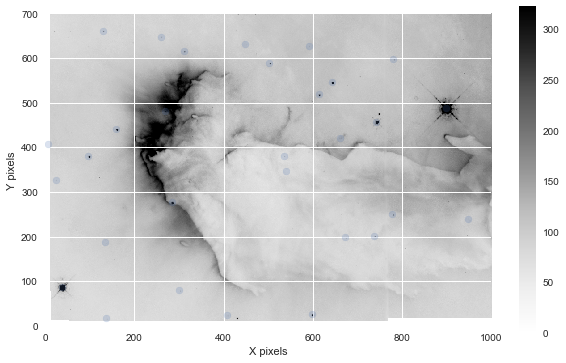

In [45]:
# Solution
# Convert coordinates to pixel positions
gaia_x, gaia_y = hst_image_wcs.all_world2pix(gaia_hdulist[1].data['ra'],
                                             gaia_hdulist[1].data['dec'],
                                             origin)

# Plot the image
plt.imshow(hst_hdulist[0].data, vmin=vmin, vmax=vmax, interpolation='none')
plt.xlabel('X pixels')
plt.ylabel('Y pixels')
plt.colorbar()

# Plot the sources
plt.scatter(gaia_x, gaia_y, alpha=0.2)

# Focus over the region of interest
plt.xlim([0,1000])
plt.ylim([0,700])

#### Using WCS axes

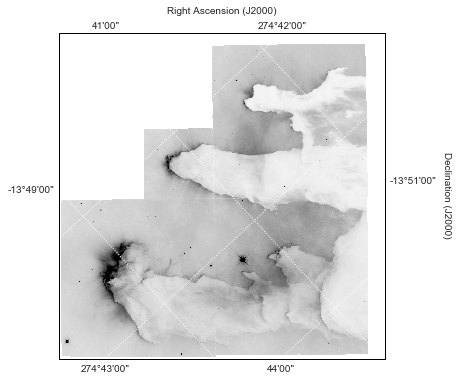

In [46]:
ax = plt.subplot(projection=hst_image_wcs)

ax.imshow(hst_hdulist[0].data, vmin=vmin, vmax=vmax, origin='lower')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')